<a href="https://colab.research.google.com/github/JohnPaul1278/ps-final/blob/main/ps_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import time, os, sys, re
import zipfile, json, datetime, string
import numpy as np
from statistics import *

import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.style.use('classic')

# Why are we so depressed about the economy?

Numerous recent reports have suggested that the economy is doing better than it has in years, but consumer sentiment doesn't match this positivity. The University of Michigan conducts a consumer sentiment survey that measures how people feel about the state of the economy and has found that, although recent months have shown an upwards trend, Americans are still far more pessimistic about the state of the economy than they have been in years past.

Text(0.5, 1.0, 'consumer sentiment')

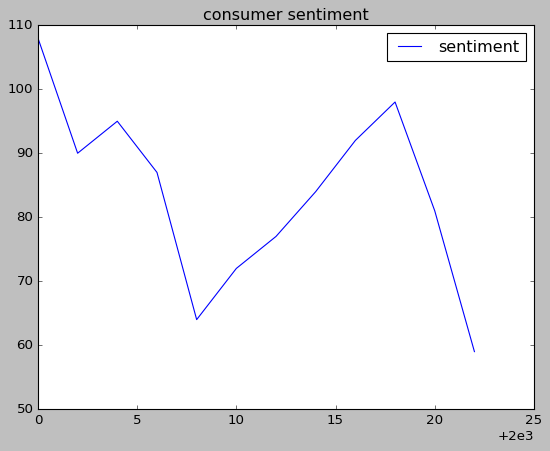

In [24]:
x1 = [2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020,2022]
y1 = [108,90,95,87,64,72,77,84,92,98,81,59]
plt.plot(x1, y1, label = "sentiment")

#here is the webpage for my source: http://www.sca.isr.umich.edu/
#and here is where I found the specific data I'm using: http://www.sca.isr.umich.edu/tables.html
#I used the yearly Consumer Sentiment Index data and tried to import it as both a csv and a xls file, but neither worked
#the data isn't formatted well apparently. The data is still good, though, and the source is well respected in economics.
#since the only variables are the year and the sentiment score, I decided to input the data manually, which you can see above.
#I certainly would not do this for a larger dataset, but the amount of time it would take to clean up these files is just too long.

plt.title('consumer sentiment')

plt.legend()
plt.show()

While it is worth noting that the consumer sentiment index has since risen during 2023, there is still a discrepancy between the prosperity that economists measure and the impression that the average person has.

Claudia Sahm, creator of the "Sahm Rule" for measuring incoming recessions, was interviewed by multiple sources trying to explain the phenomenon. She told NPR, “frankly, I think this year, in 2023, the disconnect has become glaring because as inflation has come down, inflation back down, unemployment's still low, and people are not having any of it” Goldmark, 2023.

Indeed, the economy is recovering from the pandemic recession better than many economists had hoped it would. So why are people still pessimistic? Sahm points to perceptions of economic stability as a possible culprit, noting that "when I asked people - are you better off financially than you were a year ago or five years ago? - I think of that as - do you have a bigger paycheck; do you have more in your bank account; do you have, you know, a better job? But I can see the case for when you ask people - are you better off financially? - they bring in more than that. They bring in - how stable is it?” Goldmark, 2023.

To measure that stability, we need to look at how well people have been doing for the last several decades. We'll begin by looking at median weekly income for adults over twenty five years old, and we'll group them by educational attainment, since the Real Wage Trends report published by Donovan and Bradley in 2019 indicates that education has become a powerful indicator for distinguishing different groups of workers by wage.

<Axes: xlabel='DATE'>

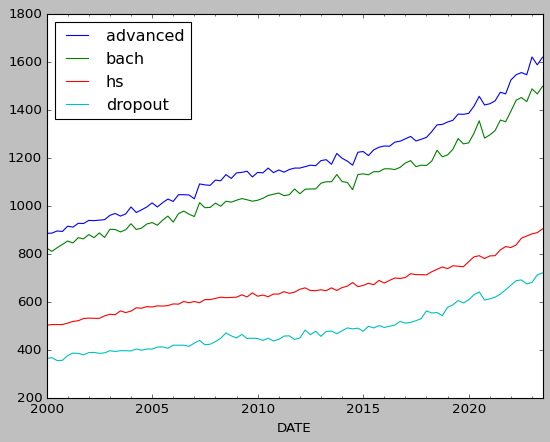

In [ ]:
start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2023, 10, 1)
df = pdr.DataReader(['LEU0252918500Q','LEU0252919100Q', 'LEU0252917300Q', 'LEU0252916700Q'],
                    'fred', start, end)
#LEU0252918500Q= bachelor's degree or higher
#LEU0252919100Q= bachelor's degree only
#LEU0252917300Q= high school education
#LEU0252916700Q= less than high school education
#these datasets all look at both wage and salary workers ages 25 and up.

df=df.rename(columns={"LEU0252918500Q": "advanced",
                      "LEU0252919100Q": "bach",
                      "LEU0252917300Q": "hs",
                      "LEU0252916700Q": "dropout",
                      "DATE": "year"})

df.plot()

This data shows the value of education in terms of wages, but it doesn't appear that anyone's wages are getting smaller. This chart does not account for inflation, however, so we'll see if that changes things. Perhaps inflation has been steep enough to render all of the increases in wages null. In a worst case scenario, work may be becoming LESS valuable over time, which would explain why Americans aren't impressed by the latest economic trends.

In [ ]:
pip install cpi==1.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 10.0 MB/s eta 0:00:00


In [ ]:
import cpi

/usr/local/lib/python3.10/dist-packages/cpi/__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


In [ ]:
cpi.update()

In [ ]:
df

,advanced,bach,hs,dropout
DATE,,,,
2000-01-01,886,825,503,365
2000-04-01,887,811,506,368
2000-07-01,896,826,506,356
2000-10-01,894,840,506,357
2001-01-01,916,854,512,377
...,...,...,...,...
2022-07-01,1556,1452,866,692
2022-10-01,1547,1435,875,675
2023-01-01,1621,1488,884,682


While this part is fairly tedious, I found it easier than trying to convert the entire dataset. I'm going to inflate the weekly median income of working adults over the age of 25 in four categories:
1. Adults with a bachelor's degree or higher
2. Adults with a bachelor's degree but nothing higher
3. Adults who graduated from high school
4. Adults who did not graduate from high school.

I'm going to inflate the value of each category using the January reports from every four years starting with the year 2000 and ending with the year 2020.

# Weekly median income in the year 2000

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(886, 2000)

1394.189430894309

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(825, 2000)

1298.2012195121954

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(503, 2000)

791.509349593496

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(365, 2000)

574.3556910569106

# Weekly median income in the year 2004

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(996, 2004)

1428.7248279512971

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(926, 2004)

1328.3124404446799

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(562, 2004)

806.16802541027

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(396, 2004)

568.0472207517205



```
#
```

# Weekly median income in the year 2008

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(1108, 2008)

1394.4755066116124

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(1012, 2008)

1273.6545240893067

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(615, 2008)

774.0094192835214

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(435, 2008)

547.4700770541981

# Weekly median income in the year 2012

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(1158, 2012)

1366.6875440995846

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(1057, 2012)

1247.485953465683

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(653, 2012)

770.6795909300766

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(450, 2012)

531.096195893621

# Weekly median income in the year 2016

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(1250, 2016)

1411.2609215564548

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(1155, 2016)

1304.0050915181641

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(679, 2016)

766.5969325894662

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(494, 2016)

557.7303161991109

# Weekly median income in the year 2020

Adults over the age of 25 with a bachelor's degree or higher:

In [ ]:
cpi.inflate(1386, 2020)

1451.1145971384526

Adults over the age of 25 with a bachelor's degree but nothing higher:

In [ ]:
cpi.inflate(1263, 2020)

1322.336028994131

Adults over the age of 25 who graduated from high school:

In [ ]:
cpi.inflate(768, 2020)

804.0808157303981

Adults over the age of 25 who did not graduate from high school:

In [ ]:
cpi.inflate(609, 2020)

637.610959348714

Text(0.5, 1.0, 'median weekly income by education attainment adjusted for inflation')

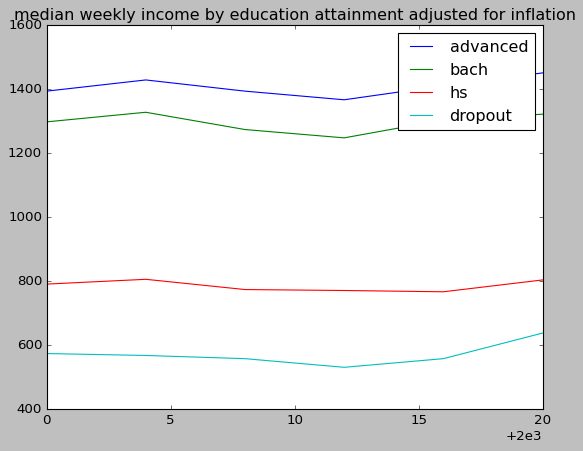

In [ ]:
x1 = [2000,2004,2008,2012,2016,2020]
y1 = [1394,1429,1394,1367,1411,1451]
plt.plot(x1, y1, label = "advanced")

x2 = [2000,2004,2008,2012,2016,2020]
y2 = [1298,1328,1274,1248,1304,1322]
plt.plot(x2, y2, label = "bach")

x3 = [2000,2004,2008,2012,2016,2020]
y3 = [791,806,774,771,767,804]
plt.plot(x3, y3, label = "hs")

x4 = [2000,2004,2008,2012,2016,2020]
y4 = [574,568,558,531,558,638]
plt.plot(x4, y4, label = "dropout")

plt.title('median weekly income by education attainment adjusted for inflation')

plt.legend()
plt.show()


With the data adjusted for inflation, it appears the median weekly income for all four categories has remained fairly constant over the last twenty years. The value of a week of work actually seems to be increasing for workers in general, with less than a high school education seeing an especially sharp rise in the value of their work.

It is also worth noting that the divide between categories has changed very little as well, although this is not terribly surprising given that we are looking at medians instead of averages. Recent discourse suggests that the most significant gains in income and wealth have come from the wealthiest individuals in society, the top one percent or less, and we would therefore expect to see their gains reflected in the averages instead of the medians.

In order to compare these adjusted wages to the national sentiment regarding the economy, I'm going to add the consumer sentiment data to this graph. Because the consumer sentiment index works in a scale that hovers above and below 100 while wages have dealt in the 1000s, I'm going to multiply the consumer sentiment data by 10 so it shows up next to the rest of the data. Since the consumer sentiment index uses numbers that are essentially arbitrary, this conversion will make the data appear more visible without tainting the relative changes in sentiment score on a yearly basis.

Text(0.5, 1.0, 'adjusted median income compared with consumer sentiment')

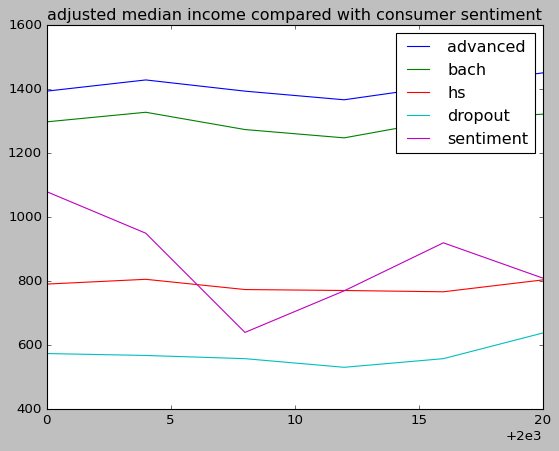

In [27]:
x1 = [2000,2004,2008,2012,2016,2020]
y1 = [1394,1429,1394,1367,1411,1451]
plt.plot(x1, y1, label = "advanced")

x2 = [2000,2004,2008,2012,2016,2020]
y2 = [1298,1328,1274,1248,1304,1322]
plt.plot(x2, y2, label = "bach")

x3 = [2000,2004,2008,2012,2016,2020]
y3 = [791,806,774,771,767,804]
plt.plot(x3, y3, label = "hs")

x4 = [2000,2004,2008,2012,2016,2020]
y4 = [574,568,558,531,558,638]
plt.plot(x4, y4, label = "dropout")

x5 = [2000,2004,2008,2012,2016,2020]
y5 = [1080,950,640,770,920,810]
plt.plot(x5, y5, label = "sentiment")

plt.title('adjusted median income compared with consumer sentiment')

plt.legend()
plt.show()


# Discussion

Perhaps there are other reasons that Americans feel so bad about the economy. Relative deprivation, for example, might lead people to feel like they are struggling when they compare themselves to the economic elite. Okulicz-Kozaryn presents this as a possible explanation for the decrease in happiness over the past few years, and while "happiness" and "confidence in the economy" are certainly not interchangable, the relative deprivation variable would logically behave similarly. The prevalence of social media and other internet sources make the gap far more visible.

When we adjust the median incomes from our four education groups to inflation, it appears as though wages have remained fairly consistent. So are things worse, better, or the same? The data looks different when we compare the average wages from twenty years ago instead of the medians. This may be because the divide between the super rich and everyone else has grown, since such growth would be reflected in a comparison of averages but not a comparison of medians.

On the other hand, debt has taken on a larger role in our economy and is not necessarily reflected in the conversion equation for inflation. The mundane, everyday economy may have been accounted for in the inflation equation, but what about real estate values? What about college debt? Credit card debt? Our wages still have the same spending power in the general economy, but how much has debt increased for the average American? Perhaps the prevalence of debt in our society has led to our pessimism issue; yes, we can pay for our daily goods, services, and bills, but our debts seem no closer to being paid off. Okulicz-Kozaryn states that “Perhaps, the increasing gap in happiness between income quintiles is not due to increasing income inequality, but due to increasing costs. Over the past four decades, in addition to stagnant wages, other troubling trends have developed. Healthcare costs have skyrocketed, and education costs have increased even more. Household debt increased, and college debt increased even more, surpassing credit card debt. One could therefore argue that it is rising costs, not inequality, that is responsible for the decline in happiness among the poor.” The sheer scale of debt in many cases can make the issue seem insurmountable, and promises that "things are getting better or will get better" may ring hollow after so many years of prices rising.


A third alternative might be the development of class consciousness in the United States. Our wages and purchasing power have remained consistent for the past several decades, yes, but only now are the majority of Americans waking up to the injustice of the entire economic system. In other words: our conditions have not changed, but our understanding of our conditions has evolved to the point where the conditions that were acceptable twenty years ago are not acceptable today. The consumer sentiment data shows a sharp downturn after 2016. Political polarization has driven more and more people to both the far left and far right; neither of these ideological movements approve of the neoliberal status quo, and this may be responsible for our apparent pessimism. Ideology, unfortunately, can be difficult to measure. The GSS may be another place to look for more answers, but it may take years before we are truly able to find a causal link between our perception of the economy and its reality.


# Works Cited

Armstrong, Robert. 2023. “Claudia Sahm: It’s Clear Now Who Was Right.” Retrieved December 9, 2023 (https://www.ft.com/content/33f9dbb0-c620-4cd7-a7dc-02e47fe28c11).

Donovan, Sarah, and David Bradley. 2019. Real Wage Trends, 1979 to 2018. 45090. Congressional Research Service.

Goldmark, Alex, dir. 2023. “Why Are We so Bummed about the Economy? : Planet Money.” NPR.

Hsu, Joanne. 2023. “Surveys of Consumers.” University of Michigan Survey of Consumers. Retrieved December 9, 2023 (http://www.sca.isr.umich.edu/).

Okulicz-Kozaryn, Adam, and Joan Maya Mazelis. 2017. “More Unequal in Income, More Unequal in Wellbeing.” Social Indicators Research 132(3):953–75. doi: 10.1007/s11205-016-1327-0.
